# Building a regression model in pytorch

## Imports and data download

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
data = fetch_california_housing()
X, y = data.data, data.target

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [3]:
print(X_train.min(axis=0), X_train.max(axis=0) , X_train.mean(axis=0), X_train.std(axis=0))

torch.return_types.min(
values=tensor([   0.4999,    1.0000,    0.8462,    0.3333,    5.0000,    0.6923,
          32.5400, -124.3500]),
indices=tensor([  256, 13525,  8146,   700,   351, 13779,  8542,  1337])) torch.return_types.max(
values=tensor([ 1.5000e+01,  5.2000e+01,  1.3253e+02,  3.4067e+01,  2.8566e+04,
         1.2433e+03,  4.1950e+01, -1.1447e+02]),
indices=tensor([ 1234,     1,  4560,  4560,  7972,  6855,  8570, 12367])) tensor([ 3.8655e+00,  2.8735e+01,  5.4034e+00,  1.0917e+00,  1.4229e+03,
         3.1240e+00,  3.5631e+01, -1.1957e+02]) tensor([1.8971e+00, 1.2574e+01, 2.1687e+00, 4.2155e-01, 1.1065e+03, 1.2377e+01,
        2.1296e+00, 2.0013e+00])


In [4]:
print(y_train.min(), y_train.max() , y_train.mean())

tensor(0.1500) tensor(5.0000) tensor(2.0658)


In [5]:
scalerX = StandardScaler()
scalerY = StandardScaler()

X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

y_train = scalerY.fit_transform(y_train)
y_test = scalerY.transform(y_test)

In [6]:
print(X_train.min(axis=0), X_train.max(axis=0) , X_train.mean(axis=0), X_train.std(axis=0))

[-1.77413659 -2.20582858 -2.10144056 -1.79899723 -1.28142057 -0.19646774
 -1.45169145 -2.38853377] [  5.86958456   1.85031456  58.62180174  78.2264243   24.53102741
 100.2033286    2.96709967   2.54840936] [-5.39107917e-17  5.80048688e-17  7.33437291e-17  2.18863098e-17
 -7.66558778e-17  2.12585577e-17 -1.32282301e-15  3.07983721e-16] [1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
print(y_train.min(), y_train.max() , y_train.mean())

-1.6559612065965525 2.5363112900221467 -7.131494198464355e-17


In [8]:
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

## Define a model and learn it

In [9]:
# Define the model
model = nn.Sequential(
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [10]:
def reinit_model(model):
  for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

In [11]:
#Useful
batch_size=32
epoch =1
batch_start = torch.arange(0, len(X_train), batch_size)
with tqdm.tqdm(batch_start, unit="batch", mininterval=0) as bar:
    bar.set_description(f"Epoch {epoch}")
    for start in bar:
        i=0

Epoch 1: 100%|██████████| 452/452 [00:00<00:00, 2951.54batch/s]


In [12]:
def train_model(model, n_epochs, batch_size, X_train, y_train, X_test, y_test, loss_fn, optimizer):
    history = {
        "train_loss": [],
        "test_loss": []
    }
    batch_start = torch.arange(0, len(X_train), batch_size)

    for epoch in range(n_epochs):
        model.train()
        running_loss = 0.0
        N = 1

        for start in batch_start:
            # Take a batch of data
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]

            # Forward pass
            output = model(X_batch)
            loss = loss_fn(output, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate the running loss
            running_loss += loss.item()
            N += 1

        train_loss = running_loss / N
        history["train_loss"].append(train_loss)

        # Evaluate the model on the test set
        model.eval()
        with torch.no_grad():  # Disable gradient calculation for evaluation
            output = model(X_test)
            loss = loss_fn(output, y_test)
            history["test_loss"].append(loss.item())

        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {loss.item():.4f}')

    return history

In [13]:
reinit_model(model)

batch_size = 32
n_epoch = 5
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

history_1 = train_model(model, n_epoch, batch_size, X_train, y_train, X_test, y_test, criterion, optimizer)

torch.Size([32, 8])


# To do

1.   Learn few model with MSE Loss in order to achieve reasonable loss (to be defined). This will allow you to select an architecture with an optimizer, a bacth size etc to perform next experiments
2.   Add a small noise (e.g. gaussian noise with null mean and variance 0.1 or 0.2) to the target to predict, and measure how the performance of above selected predictor degrades when trainign with such data.
3. Define an $\epsilon$-insensitive loss function for the MSE loss. The $\epsilon$-insensitive loss function is defined as $min(mse- \epsilon,0)$. What is the effect if such a loss ?
4. Use the above loss function (with different values of $\epsilon$) for learning while testing is still evaluated with MSE loss. Comment the results obtained.  



In [94]:
class EpsilonInsensitiveMSELoss(nn.Module):
    __constant__ = ['reduction']
    def __init__(self, epsilon: float = 1.0, reduction: str = 'mean'):
        super().__init__()
        self.epsilon = epsilon
        self.reduction = reduction

    def forward(self, input, target):
        mse_loss = nn.functional.mse_loss(input, target, reduction=self.reduction)
        return torch.clamp(mse_loss - self.epsilon, min=0.0)

In [95]:
epsilon_loss_fn = EpsilonInsensitiveMSELoss(epsilon=0.5)

In [99]:
def epsilon_train_model(model, n_epochs, batch_size, X_train, y_train, X_test, y_test, loss_fn, epsilon_loss_fn, optimizer):
    history = {
        "train_loss": [],
        "test_loss": []
    }
    batch_start = torch.arange(0, len(X_train), batch_size)

    for epoch in range(n_epochs):
        model.train()
        running_loss = 0.0
        N = 1

        for start in batch_start:
            # Take a batch of data
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]

            # Forward pass
            output = model(X_batch)
            loss = epsilon_loss_fn(output, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate the running loss
            running_loss += loss.item()
            N += 1

        train_loss = running_loss / N
        history["train_loss"].append(train_loss)

        model.eval()
        with torch.no_grad():
            output = model(X_test)
            loss = loss_fn(output, y_test)
            history["test_loss"].append(loss.item())

        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {loss.item():.4f}')

    return history

In [106]:
reinit_model(model)

batch_size = 32
n_epoch = 10
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

history_2 = epsilon_train_model(model, n_epoch, batch_size, X_train, y_train, X_test, y_test, criterion, epsilon_loss_fn, optimizer)

Epoch [1/10], Train Loss: 0.2919, Test Loss: 0.9495
Epoch [2/10], Train Loss: 0.1894, Test Loss: 0.8450
Epoch [3/10], Train Loss: 0.1231, Test Loss: 0.7610
Epoch [4/10], Train Loss: 0.0791, Test Loss: 0.6962
Epoch [5/10], Train Loss: 0.0538, Test Loss: 0.6497
Epoch [6/10], Train Loss: 0.0391, Test Loss: 0.6147
Epoch [7/10], Train Loss: 0.0300, Test Loss: 0.5876
Epoch [8/10], Train Loss: 0.0240, Test Loss: 0.5667
Epoch [9/10], Train Loss: 0.0202, Test Loss: 0.5503
Epoch [10/10], Train Loss: 0.0175, Test Loss: 0.5371


Epoch [1/10], Train Loss: 0.8487, Test Loss: 0.9835
Epoch [2/10], Train Loss: 0.7550, Test Loss: 0.8838
Epoch [3/10], Train Loss: 0.6359, Test Loss: 0.7613
Epoch [4/10], Train Loss: 0.5073, Test Loss: 0.6537
Epoch [5/10], Train Loss: 0.4070, Test Loss: 0.5869
Epoch [6/10], Train Loss: 0.3485, Test Loss: 0.5542
Epoch [7/10], Train Loss: 0.3181, Test Loss: 0.5350
Epoch [8/10], Train Loss: 0.2987, Test Loss: 0.5186
Epoch [9/10], Train Loss: 0.2830, Test Loss: 0.5025
Epoch [10/10], Train Loss: 0.2692, Test Loss: 0.4868
Epoch [1/10], Train Loss: 0.6924, Test Loss: 1.0406
Epoch [2/10], Train Loss: 0.6555, Test Loss: 0.9943
Epoch [3/10], Train Loss: 0.5982, Test Loss: 0.9166
Epoch [4/10], Train Loss: 0.5040, Test Loss: 0.8021
Epoch [5/10], Train Loss: 0.3846, Test Loss: 0.6752
Epoch [6/10], Train Loss: 0.2747, Test Loss: 0.5722
Epoch [7/10], Train Loss: 0.1978, Test Loss: 0.5050
Epoch [8/10], Train Loss: 0.1555, Test Loss: 0.4671
Epoch [9/10], Train Loss: 0.1335, Test Loss: 0.4406
Epoch [10/1

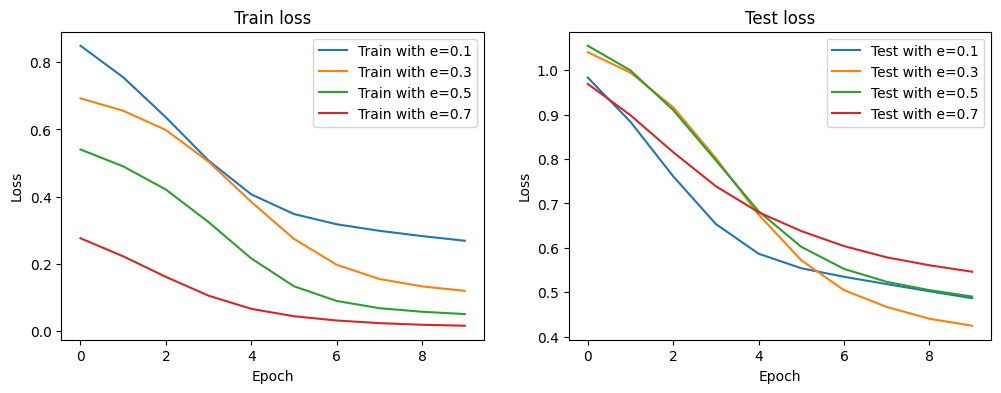

In [110]:
epsilons = [0.1, 0.3, 0.5, 0.7]
plt.figure(figsize=(12, 4))
for e in epsilons:
    reinit_model(model)
    n_epoch = 10
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    epsilon_loss_fn = EpsilonInsensitiveMSELoss(epsilon=e)
    history_2 = epsilon_train_model(model, n_epoch, batch_size, X_train, y_train, X_test, y_test, criterion, epsilon_loss_fn, optimizer)
    plt.subplot(1, 2, 1)
    plt.plot(history_2["train_loss"], label=f"Train with e={e}")
    plt.legend()
    plt.title("Train loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.subplot(1, 2, 2)
    plt.plot(history_2["test_loss"], label=f"Test with e={e}")
    plt.title("Test loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()